In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
import os

# Add the scripts folder to the Python path
scripts_path = os.path.abspath('../scripts')
print(f"Scripts path: {scripts_path}")
sys.path.append(scripts_path)

# Now import the required functions
try:
    from data_extraction import load_data_from_postgres, load_data_using_sqlalchemy
    from sql_queries import execute_telecom_queries
    print("Imports successful")
except ImportError as e:
    print(f"Error importing modules: {e}")

Scripts path: /home/dura/Codes/week2/scripts
Imports successful


In [ ]:
# SQL query
query = "SELECT * FROM xdr_data;"  

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


/home/dura/Codes/week2/scripts/data_extraction.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [4]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
# Identify the top 10 handsets used by the customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 handsets used by customers:")
print(top_10_handsets)

Top 10 handsets used by customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [10]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 handset manufacturers:")
print(top_3_manufacturers)

Top 3 handset manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [11]:
# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

print("Top 5 handsets per top 3 handset manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}")
    print(handsets)

Top 5 handsets per top 3 handset manufacturer:

Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Manufacturer: Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [12]:
# Aggregate user behavior information
user_behavior = df.groupby('Bearer Id').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume
user_behavior['Total Data Volume (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

print("Aggregated user behavior information:")
print(user_behavior.head())

Aggregated user behavior information:
      Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0  6.917538e+18    24534.0       500721999.0        41704610.0   
1  6.917538e+18    21489.0       709549265.0        38693596.0   
2  6.917538e+18    27786.0       854465860.0        15548926.0   
3  6.917538e+18    15635.0       825786510.0        49605688.0   
4  6.917538e+18    24264.0       624957763.0        21983463.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2404741.0                   2410.0          5791591.0   
1                2478607.0                  11936.0          3605446.0   
2                 944612.0                   2827.0         10373157.0   
3                1817239.0                  19827.0           269988.0   
4                1867318.0                  18928.0          1689296.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
0          2871336.0          782388.0  

In [13]:
print(user_behavior.shape)  # Rows and columns
print(user_behavior.dtypes)  # Data types of each column


(134708, 19)
Bearer Id                    float64
Dur. (ms)                    float64
Total DL (Bytes)             float64
Total UL (Bytes)             float64
Social Media DL (Bytes)      float64
Social Media UL (Bytes)      float64
Google DL (Bytes)            float64
Google UL (Bytes)            float64
Email DL (Bytes)             float64
Email UL (Bytes)             float64
Youtube DL (Bytes)           float64
Youtube UL (Bytes)           float64
Netflix DL (Bytes)           float64
Netflix UL (Bytes)           float64
Gaming DL (Bytes)            float64
Gaming UL (Bytes)            float64
Other DL (Bytes)             float64
Other UL (Bytes)             float64
Total Data Volume (Bytes)    float64
dtype: object


In [14]:
print(user_behavior.describe())  # Numerical data summary
print(user_behavior.info())  # Missing values and data types


          Bearer Id     Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count  1.347080e+05  1.347080e+05      1.347080e+05      1.347080e+05   
mean   9.914375e+18  1.161105e+05      5.029635e+08      4.548838e+07   
std    2.881902e+18  9.982828e+04      3.105105e+08      1.978494e+07   
min    6.917538e+18  7.142000e+03      8.827082e+06      2.866892e+06   
25%    7.277826e+18  6.008050e+04      2.614752e+08      3.407356e+07   
50%    7.349883e+18  8.640000e+04      4.877182e+08      4.252723e+07   
75%    1.304243e+19  1.530890e+05      7.064602e+08      5.176999e+07   
max    1.318654e+19  5.659733e+06      6.288470e+09      7.021455e+08   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count             1.347080e+05            134708.000000       1.347080e+05   
mean              1.985813e+06             36421.628923       6.362095e+06   
std               1.290266e+06             23663.617308       4.131828e+06   
min               1.200000e+01

In [15]:
print(user_behavior.describe())  # Numerical data summary
print(user_behavior.info())  # Missing values and data types


          Bearer Id     Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count  1.347080e+05  1.347080e+05      1.347080e+05      1.347080e+05   
mean   9.914375e+18  1.161105e+05      5.029635e+08      4.548838e+07   
std    2.881902e+18  9.982828e+04      3.105105e+08      1.978494e+07   
min    6.917538e+18  7.142000e+03      8.827082e+06      2.866892e+06   
25%    7.277826e+18  6.008050e+04      2.614752e+08      3.407356e+07   
50%    7.349883e+18  8.640000e+04      4.877182e+08      4.252723e+07   
75%    1.304243e+19  1.530890e+05      7.064602e+08      5.176999e+07   
max    1.318654e+19  5.659733e+06      6.288470e+09      7.021455e+08   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count             1.347080e+05            134708.000000       1.347080e+05   
mean              1.985813e+06             36421.628923       6.362095e+06   
std               1.290266e+06             23663.617308       4.131828e+06   
min               1.200000e+01

In [17]:
import numpy as np

# Inspect the data
print("Data Overview:")
print(user_behavior.info())
print(user_behavior.describe())

# Handle missing values
for column in user_behavior.columns:
    if user_behavior[column].dtype in ['float64', 'int64']:
        user_behavior[column].fillna(user_behavior[column].median(), inplace=True)
    else:
        user_behavior[column].fillna(user_behavior[column].mode()[0], inplace=True)

# Handle outliers (using IQR)
for column in user_behavior.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = user_behavior[column].quantile(0.25)
    Q3 = user_behavior[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    user_behavior[column] = user_behavior[column].clip(lower=lower_bound, upper=upper_bound)

# Handle skewness (optional, if data is skewed)
for column in user_behavior.select_dtypes(include=['float64', 'int64']).columns:
    if user_behavior[column].skew() > 1:  # Apply log transformation only if highly skewed
        user_behavior[column] = user_behavior[column].apply(lambda x: np.log1p(x) if x > 0 else x)

# Review the cleaned data
print("Data after preprocessing:")
print(user_behavior.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134708 entries, 0 to 134707
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer Id                  134708 non-null  float64
 1   Dur. (ms)                  134708 non-null  float64
 2   Total DL (Bytes)           134708 non-null  float64
 3   Total UL (Bytes)           134708 non-null  float64
 4   Social Media DL (Bytes)    134708 non-null  float64
 5   Social Media UL (Bytes)    134708 non-null  float64
 6   Google DL (Bytes)          134708 non-null  float64
 7   Google UL (Bytes)          134708 non-null  float64
 8   Email DL (Bytes)           134708 non-null  float64
 9   Email UL (Bytes)           134708 non-null  float64
 10  Youtube DL (Bytes)         134708 non-null  float64
 11  Youtube UL (Bytes)         134708 non-null  float64
 12  Netflix DL (Bytes)         134708 non-null  float64
 13  Netflix UL (By

/tmp/ipykernel_15666/2461226171.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_behavior[column].fillna(user_behavior[column].median(), inplace=True)
/tmp/ipykernel_15666/2461226171.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Data after preprocessing:
           Bearer Id      Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count  134708.000000  134708.000000     134708.000000     134708.000000   
mean       43.697960      11.390385         19.801096         17.548006   
std         0.291262       0.716985          0.753239          0.332056   
min        43.380592       9.600471         17.890959         16.716599   
25%        43.431364      11.003457         19.381850         17.344032   
50%        43.441216      11.366755         20.005248         17.565655   
75%        44.014739      11.938781         20.375777         17.762321   
max        44.025728      12.586571         21.040947         18.176245   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count            134708.000000            134708.000000      134708.000000   
mean                 14.226038                10.226137          15.390798   
std                   0.841487                 0.843759         

In [18]:
# Segment users into top five decile classes based on total duration for all sessions
user_behavior['decile_class'] = pd.qcut(user_behavior['Dur. (ms)'], 5, labels=False)

# Compute the total data (DL+UL) per decile class
total_data_per_decile = user_behavior.groupby('decile_class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_data_per_decile['Total Data (Bytes)'] = total_data_per_decile['Total DL (Bytes)'] + total_data_per_decile['Total UL (Bytes)']

print("Total data per decile class:")
print(total_data_per_decile)

Total data per decile class:
   decile_class  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
0             0     532214.992188     471868.139559        1.004083e+06
1             1     726124.208159     643894.739818        1.370019e+06
2             2     337719.475974     299526.515674        6.372460e+05
3             3     532506.305002     472051.615080        1.004558e+06
4             4     538801.010744     476515.753542        1.015317e+06


In [ ]:
# Analyze basic metrics (mean, median,..)
basic_metrics = user_behavior.describe()
print("Basic metrics analysis:")
print(basic_metrics)

Basic metrics analysis:
           Bearer Id      Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count  134708.000000  134708.000000     134708.000000     134708.000000   
mean       43.697960      11.390385         19.801096         17.548006   
std         0.291262       0.716985          0.753239          0.332056   
min        43.380592       9.600471         17.890959         16.716599   
25%        43.431364      11.003457         19.381850         17.344032   
50%        43.441216      11.366755         20.005248         17.565655   
75%        44.014739      11.938781         20.375777         17.762321   
max        44.025728      12.586571         21.040947         18.176245   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count            134708.000000            134708.000000      134708.000000   
mean                 14.226038                10.226137          15.390798   
std                   0.841487                 0.843759           

In [20]:
# Compute dispersion parameters for each quantitative variable
dispersion_parameters = user_behavior[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data Volume (Bytes)']].agg(['mean', 'std', 'var', 'min', 'max'])
print("Dispersion parameters:")
print(dispersion_parameters)

Dispersion parameters:
      Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  Total Data Volume (Bytes)
mean  11.390385         19.801096         17.548006                  19.928965
std    0.716985          0.753239          0.332056                   0.658978
var    0.514068          0.567369          0.110261                   0.434252
min    9.600471         17.890959         16.716599                  18.170125
max   12.586571         21.040947         18.176245                  21.074423


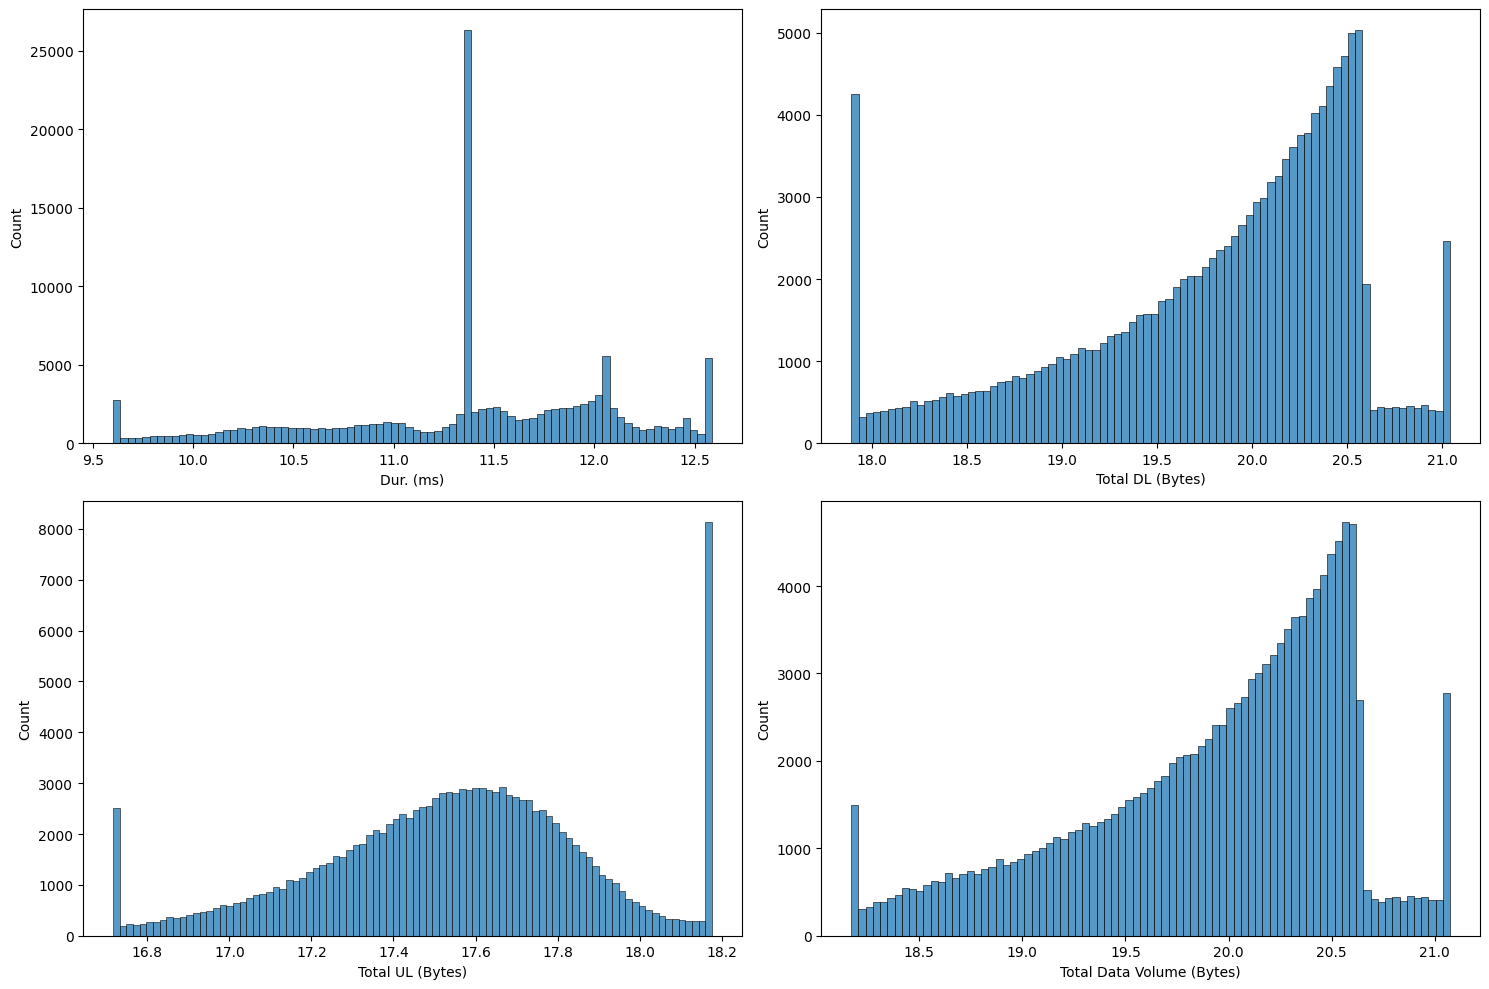

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each quantitative variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(user_behavior['Dur. (ms)'], ax=axes[0, 0])
sns.histplot(user_behavior['Total DL (Bytes)'], ax=axes[0, 1])
sns.histplot(user_behavior['Total UL (Bytes)'], ax=axes[1, 0])
sns.histplot(user_behavior['Total Data Volume (Bytes)'], ax=axes[1, 1])
plt.tight_layout()
plt.show()

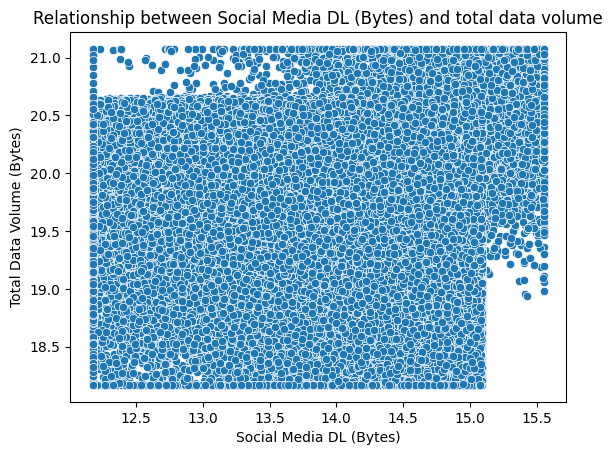

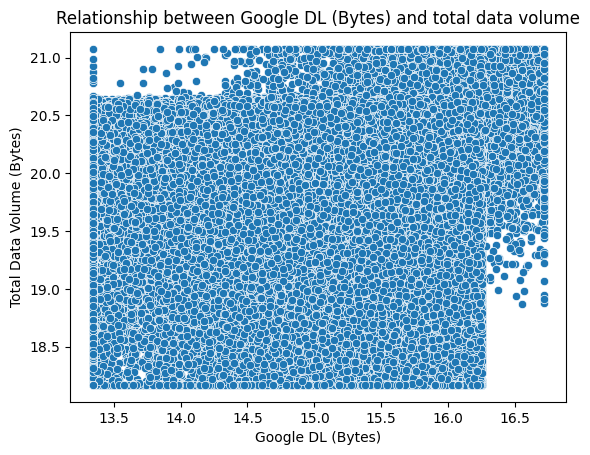

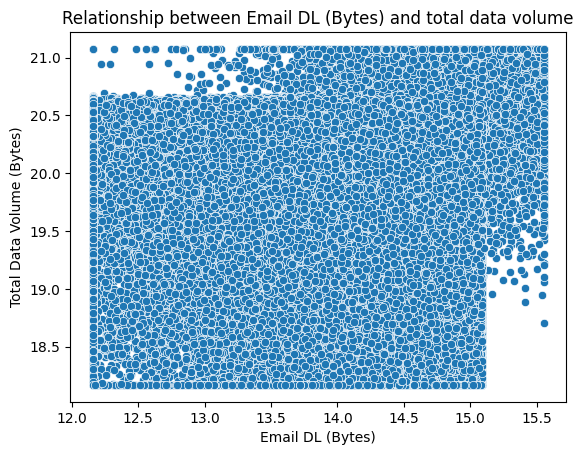

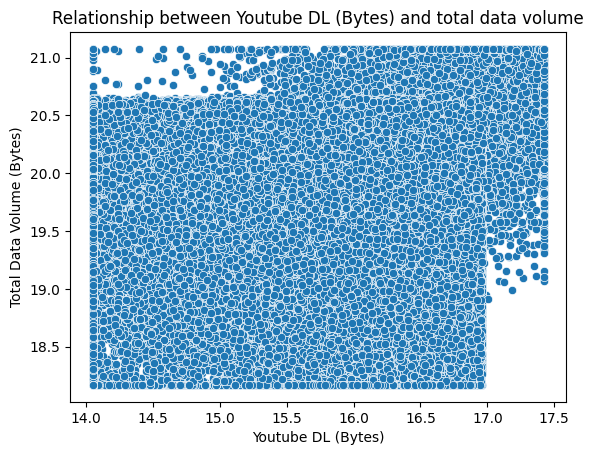

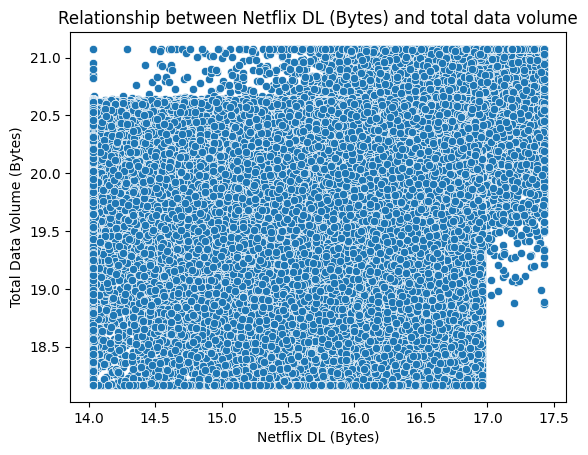

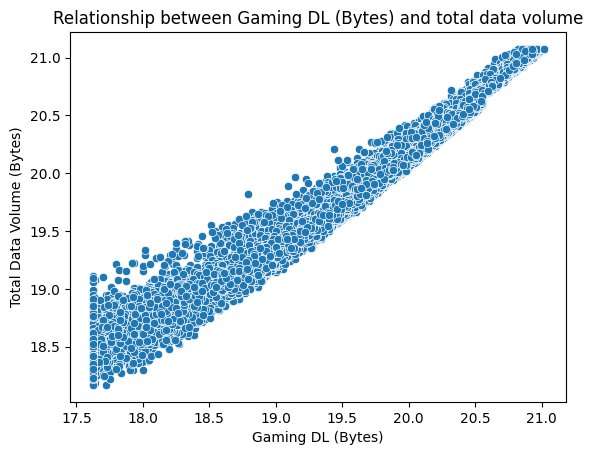

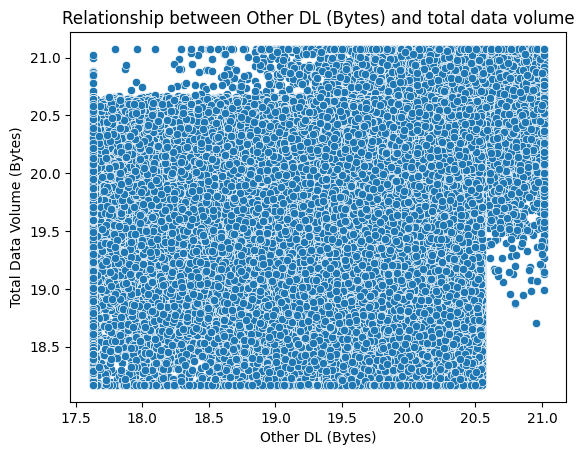

In [22]:
# Explore the relationship between each application & the total DL+UL data
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
for app in applications:
    sns.scatterplot(x=user_behavior[app], y=user_behavior['Total Data Volume (Bytes)'])
    plt.title(f'Relationship between {app} and total data volume')
    plt.xlabel(app)
    plt.ylabel('Total Data Volume (Bytes)')
    plt.show()

Correlation matrix:
                           Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                   1.000000           0.092614   
Google DL (Bytes)                         0.092614           1.000000   
Email DL (Bytes)                          0.097810           0.093378   
Youtube DL (Bytes)                        0.092401           0.093192   
Netflix DL (Bytes)                        0.091130           0.096043   
Gaming DL (Bytes)                         0.094466           0.090160   
Other DL (Bytes)                          0.095599           0.091113   
Total Data Volume (Bytes)                 0.115623           0.120346   

                           Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)            0.097810            0.092401   
Google DL (Bytes)                  0.093378            0.093192   
Email DL (Bytes)                   1.000000            0.094226   
Youtube DL (Bytes)                 0.094226           

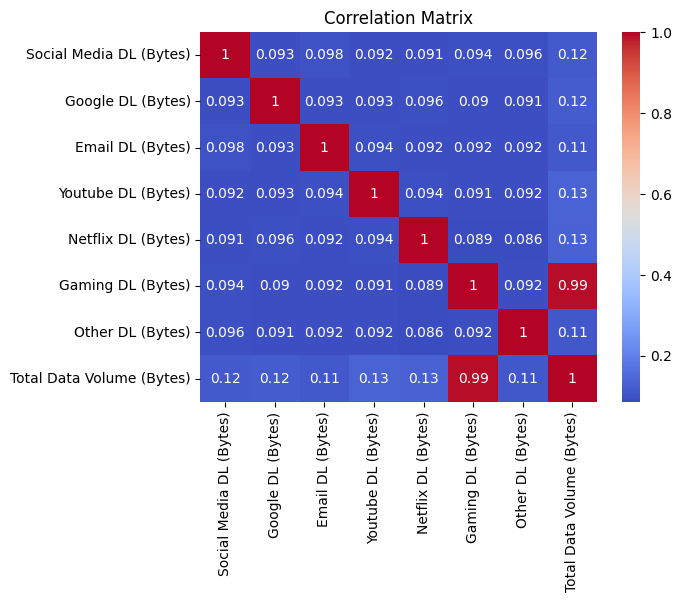

In [23]:
# Compute a correlation matrix
correlation_matrix = user_behavior[applications + ['Total Data Volume (Bytes)']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

PCA results:
   principal_component_1  principal_component_2
0               0.423164               0.100227
1               0.263254               0.431378
2              -0.305344               0.526142
3              -1.225947               1.230798
4               0.315280               0.365916


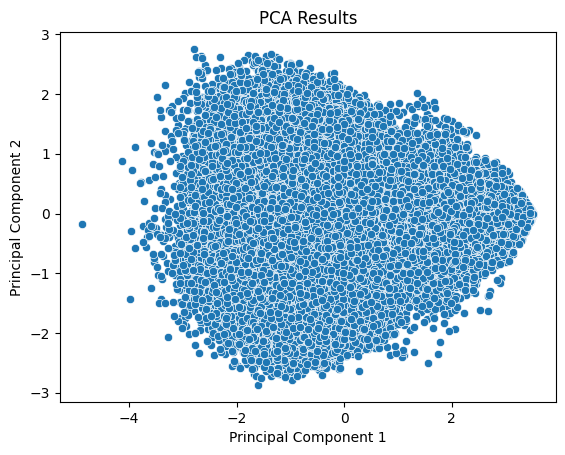

In [24]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior[applications])
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

print("PCA results:")
print(pca_df.head())

# Plot the PCA results
sns.scatterplot(x=pca_df['principal_component_1'], y=pca_df['principal_component_2'])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

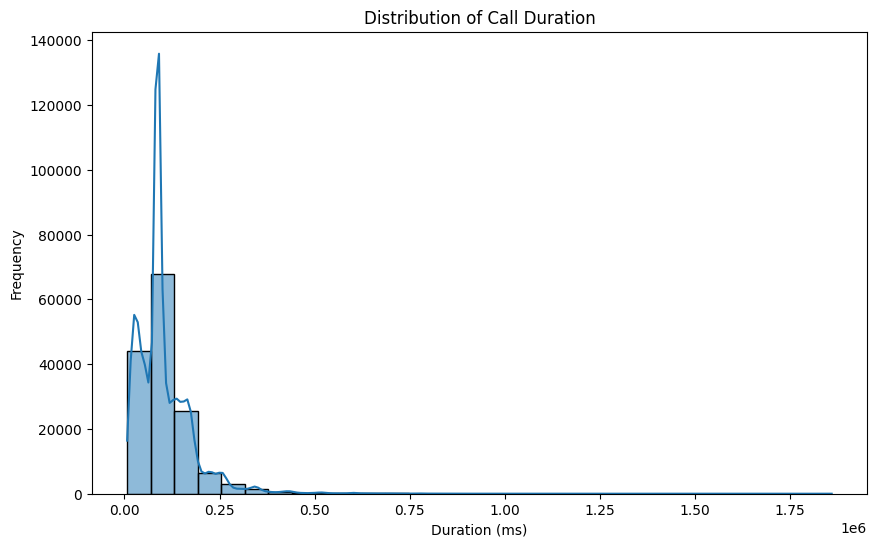

In [25]:
# Histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()